# Diabetes Prediction

# Problem statement

The goal is to develop a predictive model that can accurately predict the likelihood of an individual developing diabetes based on various features and risk factors. The objective is to assist healthcare professionals in identifying individuals who are at a higher risk of developing diabetes and take necessary preventive measures or provide early intervention.

Importing libraries

In [41]:
pip install --upgrade scikit-learn


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

In [2]:
# read the data
df = pd.read_csv("diabetes (2).csv")

In [3]:
#first 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#last 5 rows
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#getting information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 - non - diabetic
1 - diabetic

In [8]:
#checking for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There  are no null values in our data set

In [9]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [10]:
#checking for duplicates
df.duplicated().sum()

0

There are no duplicates in our data set

<function matplotlib.pyplot.show(close=None, block=None)>

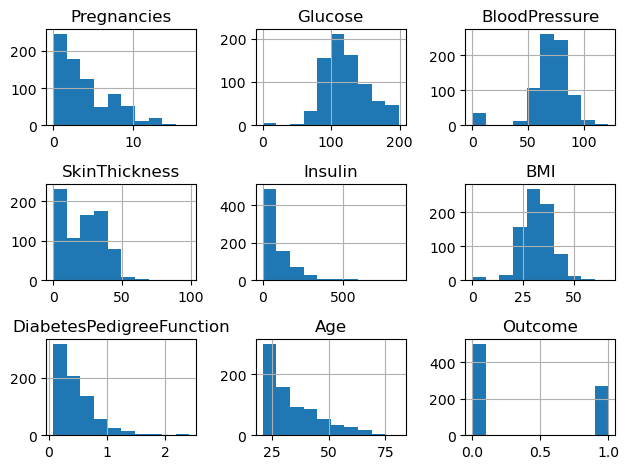

In [11]:
#ploting histograms
df.hist()
plt.tight_layout()
plt.show

In [12]:
df.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [13]:
df.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

Only Insulin has substantial amount of outliers. So we'll focus on that only.

In [14]:
#dropping outliers

In [15]:
Q1 = df['Insulin'].quantile(0.25)
Q3 = df['Insulin'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [16]:
df = df.loc[(df['Insulin'] >= lower_bound) & (df['Insulin'] <= upper_bound)]

In [17]:
df.shape

(734, 9)

In [18]:
#  separating the data and labels
X = df.drop(columns = 'Outcome', axis=1)
Y = df['Outcome']

In [19]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [20]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 734, dtype: int64

# Scaling

In [21]:
scaler = StandardScaler()

In [22]:
scaler.fit(X)

StandardScaler()

In [23]:
standardized_data = scaler.transform(X)

In [24]:
print(standardized_data)

[[ 0.63831459  0.92230173  0.15354684 ...  0.22061072  0.49738548
   1.43631516]
 [-0.84060873 -1.09401241 -0.15257371 ... -0.66389796 -0.36016635
  -0.18666744]
 [ 1.22988392  2.04247626 -0.25461389 ... -1.08088062  0.63720371
  -0.1012473 ]
 ...
 [ 0.34252992  0.0581671   0.15354684 ... -0.71444131 -0.68951596
  -0.27208757]
 [-0.84060873  0.21819203 -0.45869426 ... -0.22164362 -0.36638049
   1.18005475]
 [-0.84060873 -0.83797252  0.05150666 ... -0.18373611 -0.47202093
  -0.87002853]]


In [25]:
X = standardized_data
Y = df['Outcome']

In [26]:
print(X)
print(Y)

[[ 0.63831459  0.92230173  0.15354684 ...  0.22061072  0.49738548
   1.43631516]
 [-0.84060873 -1.09401241 -0.15257371 ... -0.66389796 -0.36016635
  -0.18666744]
 [ 1.22988392  2.04247626 -0.25461389 ... -1.08088062  0.63720371
  -0.1012473 ]
 ...
 [ 0.34252992  0.0581671   0.15354684 ... -0.71444131 -0.68951596
  -0.27208757]
 [-0.84060873  0.21819203 -0.45869426 ... -0.22164362 -0.36638049
   1.18005475]
 [-0.84060873 -0.83797252  0.05150666 ... -0.18373611 -0.47202093
  -0.87002853]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 734, dtype: int64


In [27]:
#splitting the data

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(734, 8) (587, 8) (147, 8)


# Logistic Regression

In [30]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [31]:
Y_pred = logreg.predict(X_test)
Y_train_pred = logreg.predict(X_train)
Y_train_prob = logreg.predict_proba(X_train)[:,1]

In [32]:
#!pip install -U scikit-learn


In [33]:
accuracy_train = accuracy_score(Y_train, Y_train_pred)
precision_train = precision_score(Y_train, Y_train_pred)
recall_train = recall_score(Y_train, Y_train_pred)
f1_train = f1_score(Y_train, Y_train_pred)

print("Accuracy Train:", accuracy_train)
print("Precision Train:", precision_train)
print("Recall Train:", recall_train)
print("F1 Score Train:", f1_train)

Accuracy Train: 0.778534923339012
Precision Train: 0.7315436241610739
Recall Train: 0.5477386934673367
F1 Score Train: 0.6264367816091955


In [34]:
accuracy_test = accuracy_score(Y_test, Y_pred)
precision_test = precision_score(Y_test, Y_pred)
recall_test = recall_score(Y_test, Y_pred)
f1_test = f1_score(Y_test, Y_pred)

print("Accuracy Test:", accuracy_test)
print("Precision Test:", precision_test)
print("Recall Test:", recall_test)
print("F1 Score Test:", f1_test)

Accuracy Test: 0.8027210884353742
Precision Test: 0.7692307692307693
Recall Test: 0.6
F1 Score Test: 0.6741573033707865


In [35]:
pip install --upgrade scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [60]:
print('Train AU-ROC Curve:')

# Calculate AU-ROC score

fpr, tpr, thresholds = roc_curve(Y_train, Y_train_prob )
auc_roc = roc_auc_score(Y_train, Y_train_pred)
print("\nAU-ROC Score:", auc_roc)

# Plot AU-ROC curve

plot_roc_curve(logreg, X_train, Y_train)
plt.show()

Train AU-ROC Curve:

AU-ROC Score: 0.7223229549810911


NameError: name 'plot_roc_curve' is not defined

In [61]:
print('Train AU-ROC Curve:')

# Calculate AU-ROC score

fpr, tpr, thresholds = roc_curve(Y_train, Y_train_prob )
auc_roc = roc_auc_score(Y_train, Y_train_pred)
print("\nAU-ROC Score:", auc_roc)

# Plot AU-ROC curve

plot_roc_curve(logreg, X_train, Y_train)
plt.show()

Train AU-ROC Curve:

AU-ROC Score: 0.7223229549810911


NameError: name 'plot_roc_curve' is not defined

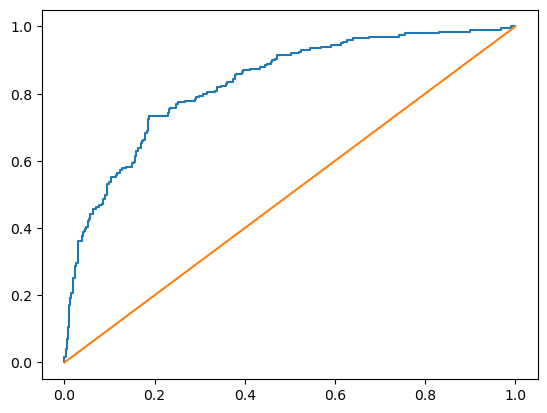

In [41]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr)
plt.show()

In [42]:
print('Test AU-ROC Curve:')

# Calculate AU-ROC score

auc_roc = roc_auc_score(Y_test, Y_pred)
print("\nAU-ROC Score:", auc_roc)

# Plot AU-ROC curve

plot_roc_curve(logreg, X_test, Y_test)
plt.show()

Test AU-ROC Curve:

AU-ROC Score: 0.7536082474226805


NameError: name 'plot_roc_curve' is not defined

# Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=1888)
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1888)

In [44]:
Y_pred_dt = decision_tree.predict(X_test)
Y_dt_train = decision_tree.predict(X_train)

In [45]:
accuracy_dt_t = accuracy_score(Y_train, Y_dt_train)
precision_dt_t = precision_score(Y_train, Y_dt_train)
recall_dt_t = recall_score(Y_train, Y_dt_train)
f1_dt_t = f1_score(Y_train, Y_dt_train)

print('Train set metrics:')
print("Accuracy:", accuracy_dt_t)
print("Precision:", precision_dt_t)
print("Recall:", recall_dt_t)
print("F1 Score:", f1_dt_t)

Train set metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [46]:
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
precision_dt = precision_score(Y_test, Y_pred_dt)
recall_dt = recall_score(Y_test, Y_pred_dt)
f1_dt = f1_score(Y_test, Y_pred_dt)

print('Test set metrics:')
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)

Test set metrics:
Accuracy: 0.7755102040816326
Precision: 0.660377358490566
Recall: 0.7
F1 Score: 0.6796116504854369


Interpretation:

Here we can see that the accuracy of train and test for DT model has a huge gap. So, we will tune the DT model

In [47]:
from sklearn.metrics import classification_report

In [48]:
print("Decision Tree")
print(classification_report(Y_test, Y_pred_dt))

Decision Tree
              precision    recall  f1-score   support

           0       0.84      0.81      0.83        97
           1       0.66      0.70      0.68        50

    accuracy                           0.78       147
   macro avg       0.75      0.76      0.75       147
weighted avg       0.78      0.78      0.78       147



In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [50]:
decision_tree = DecisionTreeClassifier()

# Defining the parameters to tune

parameters = {
    "max_depth": [1, 3, 5, 7, 9, 10],
    "min_samples_leaf": [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

In [51]:
tuning_model = GridSearchCV(decision_tree, param_grid = parameters, scoring = 'accuracy',cv=5)

In [52]:
tuning_model.fit(X_train, Y_train)

# best parameters:

best_params = tuning_model.best_params_

# best model:

best_model = tuning_model.best_estimator_

# Evaluate the performance of the best model

scores = cross_val_score(best_model, X_train, Y_train, cv=5)
mean_accuracy = scores.mean()

print("Best parameters:", best_params)
print("Mean accuracy:", mean_accuracy)

Best parameters: {'max_depth': 3, 'min_samples_leaf': 2}
Mean accuracy: 0.7768796175575836


In [53]:
Y_pred = best_model.predict(X_test)
Y_pred_train = best_model.predict(X_train)

In [54]:
accuracy_t = accuracy_score(Y_train, Y_pred_train)
precision_t = precision_score(Y_train, Y_pred_train, average='macro')
recall_t = recall_score(Y_train, Y_pred_train, average='macro')
f1_t = f1_score(Y_train, Y_pred_train, average='macro')

print('For Train:')
print("Accuracy:", accuracy_t)
print("Precision:", precision_t)
print("Recall:", recall_t)
print("F1-score:", f1_t)

For Train:
Accuracy: 0.7836456558773425
Precision: 0.7634218584551985
Recall: 0.7384279645650935
F1-score: 0.7475354318709044


In [55]:
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='macro')
recall = recall_score(Y_test, Y_pred, average='macro')
f1 = f1_score(Y_test, Y_pred, average='macro')

print('For Test:')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

For Test:
Accuracy: 0.7755102040816326
Precision: 0.7571225071225072
Recall: 0.723298969072165
F1-score: 0.7341189366949848


In [56]:
Y_train_proba = best_model.predict_proba(X_train)[:,1]
Y_test_proba = best_model.predict_proba(X_test)[:,1]

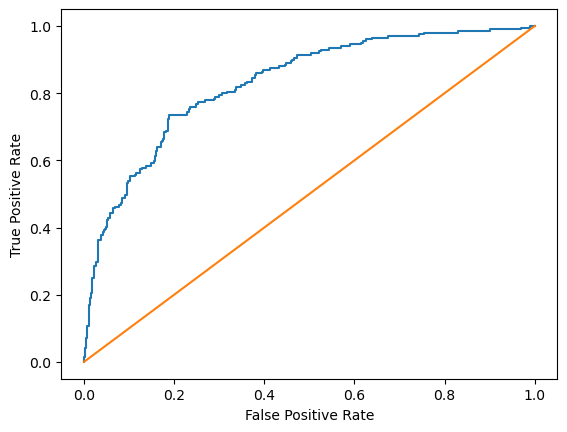


AU-ROC Score train: 0.7384279645650935


In [57]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

auc_roc1 = roc_auc_score(Y_train, Y_pred_train)
print("\nAU-ROC Score train:", auc_roc1)

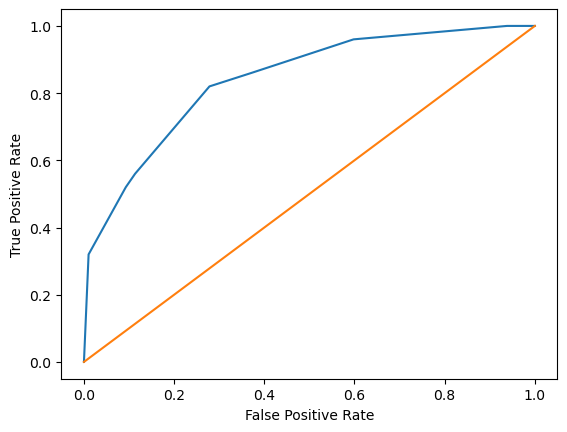


AU-ROC Score test: 0.7232989690721648


In [58]:
# Calculate AU-ROC score

fpr, tpr, thresholds = roc_curve(Y_test, Y_test_proba )

plt.plot(fpr, tpr)
plt.plot(fpr, fpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

auc_roc2 = roc_auc_score(Y_test, Y_pred)
print("\nAU-ROC Score test:", auc_roc2)